# Лабораторная работа `Microsoft ML Studio`

## Предподготовка

Зарегистрироваться на: https://studio.azureml.net/


# Microsoft ML Studio
## Машинное обучение Azure

Предоставляет разработчикам и специалистам по обработке и анализу данных широкий спектр возможностей для быстрой разработки, обучения и развертывания моделей машинного обучения. 

# Данные

Первое, что вам нужно в машинном обучении, это данные. У Машинное обучение Azure есть несколько стандартных наборов данных, их можно найти в Studio (classic) или импортировать свои данные из разных источников. В этом примере мы будем использовать образец набора данных [«Данные электростанции комбинированного типа»](https://drive.google.com/open?id=1RkP5VIPcCwxQGZkhuH51jZRP_SmyKoRX). Набор данных содержит 9568 точек данных, собранных с электростанции с комбинированным циклом за 6 лет (2006-2011 гг.), в том числе информацию о среднечасовых температурах, давления окружающей среды, относительной влажности и чистой почасовой выработки электроэнергии. [Далее...](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#)

### Начало работы в Microsoft ML Studio

### Эксперимент №1 - Регрессия

**Шаг 1**

Импортировать набор данных `для регрессии` в ML Studio. **DATASETS => +NEW =>**

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [8]:
import pandas as pd
df = pd.read_csv('Folds5x2_pp.csv', sep =',')

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

**Шаг 2**

[Создать новый эксперимент](https://docs.microsoft.com/en-us/azure/machine-learning/studio/create-experiment). **EXPERIMENTS => +NEW => Blank Experiment**

**Шаг 3**

Переименовать эксперимент.  **"Experiment created on.." => "Regression"**


**Шаг 4**


Добавить импортированный набор данных. Перетащить ранее загруженный датасет `Folds5x2_pp.csv` в область экспиримента.

**Шаг 5**

Визуализировать данные. Выбрать **Visualize**.


В этом наборе данных каждая строка представляет данные по электростанции комбинированного типа в конкретный момент времени за 6 лет (2006-2011 гг.), а переменные, связанные с каждым показателями в этот момент, отображаются в виде столбцов. Средние значения берутся из различных датчиков, расположенных вокруг станции, которые регистрируют  Мы попытаем спрогнозировать чистую почасовую выработку электроэнергии в крайнем правом столбце, используя предыдущий опыт. 


Электростанция с комбинированным циклом (CCPP) состоит из газовых турбин (GT), паровых турбин (ST) и парогенераторов с рекуперацией тепла. В CCPP электричество генерируется газовыми и паровыми турбинами, которые объединяются в один цикл и передаются от одной турбины к другой. В то время как Вакуум выбирается из паровой турбины и влияет на него, остальные три из окружающих переменных влияют на производительность GT.


|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

Реализация на `на Python`:

In [9]:
df.shape

(9568, 5)

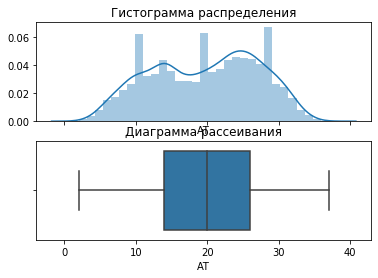

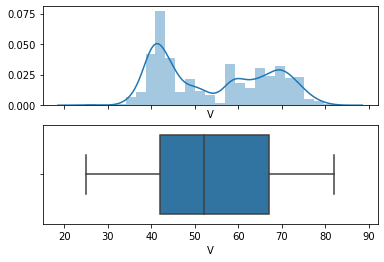

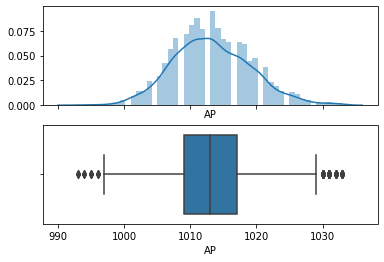

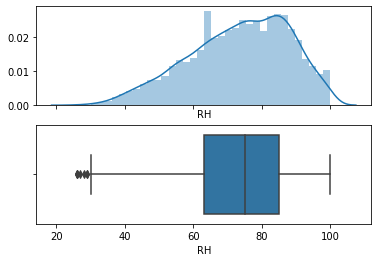

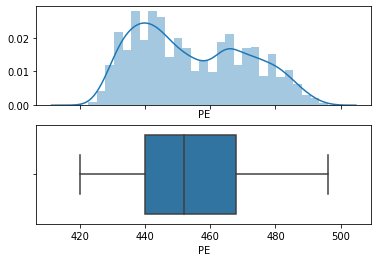

In [10]:
import matplotlib.pyplot as plt
import seaborn 


f, ax = plt.subplots(2,1, sharex=True)
ax[0].set_title("Гистограмма распределения")
ax[1].set_title('Диаграмма рассеивания')

seaborn.boxplot(df['AT'], ax=ax[1])
seaborn.distplot(df['AT'], ax=ax[0])


f, ax = plt.subplots(2,1, sharex=True)
seaborn.boxplot(df['V'], ax=ax[1])
seaborn.distplot(df['V'], ax=ax[0])

f, ax = plt.subplots(2,1, sharex=True)
seaborn.boxplot(df['AP'], ax=ax[1])
seaborn.distplot(df['AP'], ax=ax[0])


f, ax = plt.subplots(2,1, sharex=True)
seaborn.boxplot(df['RH'], ax=ax[1])
seaborn.distplot(df['RH'], ax=ax[0])

f, ax = plt.subplots(2,1, sharex=True)
seaborn.boxplot(df['PE'], ax=ax[1])
seaborn.distplot(df['PE'], ax=ax[0])
plt.show()





In [11]:
df.head(10)

,AT,V,AP,RH,PE
0,8,41,1011,90,480
1,24,58,1011,74,446
2,30,57,1007,42,439
3,19,50,1007,77,453
4,12,41,1017,97,464
5,14,39,1016,85,471
6,22,71,1008,75,442
7,14,42,1022,78,464
8,31,70,1010,37,429
9,7,38,1018,81,484


|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

**Шаг 6**

Добавить описание к экспирименту из [датасета](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#). 

**Description:**

Данные электростанции комбинированного типа

Вход:
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

Выход:
- Net hourly electrical energy output (EP) 420.26-495.76 MW

**Шаг 7**

a) Переименовать столбцы датасета. Перетащить объект `Edit Metadata` в область экспиримента. **Search..=> Edit Metadata => Lauch columns selector**




`Temp,Vacuum,Pressure, Humidity,Output`

б) Привести значения в датасете к типу `Integer` **Data Type => 'Integer'**

в) Запустите эксперимент, нажав **RUN** внизу страницы.

г) Визуализировать данные. Выбрать **Visualize**.



*После завершения эксперимента все модули имеют зеленую галочку, указывающую, что они успешно завершены.*

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

Реализация на `на Python`:

In [12]:
df.rename(columns={'AT':'Temp', 'V':'Vacuum', 'AP':'Pressure', 'RH':'Humidity', 'PE':'Output'}, inplace=True)

In [13]:
df.head()

,Temp,Vacuum,Pressure,Humidity,Output
0,8,41,1011,90,480
1,24,58,1011,74,446
2,30,57,1007,42,439
3,19,50,1007,77,453
4,12,41,1017,97,464


In [14]:
df.astype(int, inplace=True)

,Temp,Vacuum,Pressure,Humidity,Output
0,8,41,1011,90,480
1,24,58,1011,74,446
2,30,57,1007,42,439
3,19,50,1007,77,453
4,12,41,1017,97,464
...,...,...,...,...,...
9563,15,49,1012,73,463
9564,33,78,1010,60,433
9565,16,43,1014,79,466
9566,18,60,1019,95,451


In [15]:
df.dtypes

Temp        int64
Vacuum      int64
Pressure    int64
Humidity    int64
Output      int64
dtype: object

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

**Шаг 8**

В нашем наборе данных каждая строка представляет данные по электростанции комбинированного типа в конкретный момент времени за 6 лет (2006-2011 гг.), а каждый столбец - это показатели(признаки) электростанции в этот менет времени.

Выбор правильного набора признаков(фич) определяет точность прогноза. 
Некоторые признаки имеют сильную корреляцию с другими признакми, что приводит к переизбыточности данных, поэтому могут быть удалены. 


Модуль `Filter Based Feature Selection` определяет признаки в наборе данных с наибольшей предсказательной силой(точностью)



a) Отфильтровать датасет, выбрав наиболее влияющие признаки на прогноз чистой почасовой выработки электроэнергии(Output). 

Перетащить объект `Filter Based Feature Selection` в область экспиримента и выбрать столбец Output. **Search..=> Filter Based Feature Selection => Lauch columns selector**

`Output`

б) Указаь необходимое количество призаков. **Number of desired features => '3'**

в) Выбрать статистический метрику Пирсона для начисления баллов для каждого столбца(признака). **Feature scoring method => 'Pearson Correlation'**

г) Запустить эксперимент, нажав **RUN** внизу страницы.

д) Визуализировать данные. Выбрать **Visualize**.






**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|

#### Корреляция -

Статистическая взаимосвязь двух и более случайных величин(признаков/фич), при изменение одной величины меняется другая

*a) Линейный коэффициент корреляции Пирсона (для количественных данных)*


![Формула](https://statanaliz.info/wp-content/uploads/2019/04/corr_form_3.png)

Линейность корреляции проявляется в том, что точки расположены вдоль прямой линии. Положительный или отрицательный наклон такой линии определяется направлением взаимосвязи.

Коэффициент корреляции показывает тесноту линейной взаимосвязи и изменяется в диапазоне от -1 до 1. -1 (минус один) означает полную (функциональную) линейную обратную взаимосвязь. 1 (один) – полную (функциональную) линейную положительную взаимосвязь. 0 – отсутствие линейной корреляции (но не обязательно взаимосвязи). 

**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

Реализация на `на Python`:

In [16]:
research_list = [i for i in df.columns]
corr_m = df[research_list].corr()
corr_m

,Temp,Vacuum,Pressure,Humidity,Output
Temp,1.000000,0.842695,-0.506248,-0.542452,-0.947466
Vacuum,0.842695,1.000000,-0.412291,-0.312765,-0.868916
Pressure,-0.506248,-0.412291,1.000000,0.099391,0.517790
Humidity,-0.542452,-0.312765,0.099391,1.000000,0.390035
Output,-0.947466,-0.868916,0.517790,0.390035,1.000000


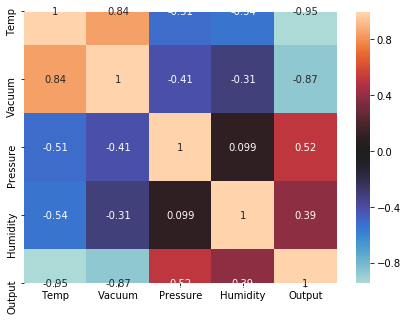

In [17]:
plt.figure(figsize=(7,5))
seaborn.heatmap(corr_m,center=0,annot=True)

Kоэфициент корреляции -0.9474658579704532


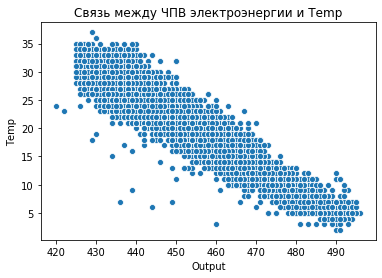

Kоэфициент корреляции -0.8689161408055117


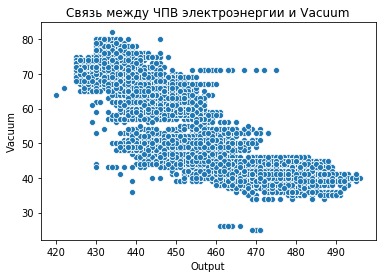

Kоэфициент корреляции 0.517790366462871


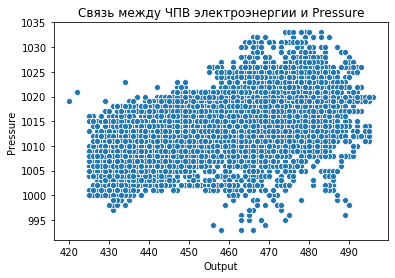

In [18]:
for i in research_list[:-1]:
    curr_corr = df[i].corr(df['Output'])
    if abs(curr_corr) >= 0.5:
        seaborn.scatterplot(x='Output',y=i,data=df)
        print("Kоэфициент корреляции " + str(curr_corr))
        plt.title("Связь между ЧПВ электроэнергии и " + str(i))
        plt.show()

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-


**Шаг 9**

Для того, чтобы понять насколько алгоритм ML хорошо отрыбатывает, необходимо его протестировать. Для этого - имеющие данные необходимо разделить на выборку, на которых модель будет обучаться(обучающая выборка), и на выборку для проверки модели(тестовая выборка).

Делим датасет на обущающую и тестовую выборку в соотношении 70/30.  Перетащить объект `Split Data` в область экспиримента. **Search..=> Split Data => Fraction of rows.... =>'0.7'**




|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

Реализация на `на Python`:

In [19]:
from sklearn.model_selection import train_test_split
X = df[['Temp','Vacuum','Pressure']].values
y = df['Output'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=10 )

In [20]:
len(X_train)/len(X)

0.6999372909698997

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-

**Шаг 10**

**Выбор типа модели:**


а) *Обучение с учителем:*
- линейная регрессия (выход - действительное число или числовой вектор)


    
Множество X – объекты, наблюдения, примеры, ситуации, входы (samples) – пространство признаков.

Множество Y – ответы, отклики, «метки», выходы (responses).

Имеется некоторая зависимость (детерминированная или вероятностная),
позволяющая по x ∈ X предсказать y ∈ Y.
Зависимость известна только на объектах из обучающей выборки.

Задача обучения с учителем: восстановить (аппроксимировать) зависимость, т. е. построить функцию (решающее правило) f : X → Y,
по новым объектам x ∈ X приближающую y на всем множестве X.

Поскольку мы хотим предсказать показатель **чистой почасовой выработки электроэнергии**, который является числом, мы будем использовать алгоритм **линейной регрессии**.


а)Перетащить объект `Linear Regression` в область экспиримента. **Search..=> Linear Regression**

б) Выбрать метод **наименьших квадратов** и его параметры. **Solution method=> 'Ordinary Least Squares'**

**L2 =>0.001**



|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-





**Шаг 11**

а)Обучить модель. Выбрать целевой(выходной) признак.


Перетащить объект [`Train Model`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/train-model) в область экспиримента и столбец Output.  **Search..=> Train Model => Lauch columns selector** 

`Output`

б) Посмотреть коэффициенты каждого из признаков.

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [22]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



**Шаг 12**

Получить предсказания модели на тестовом датасете. 

a) Соединить модель с обучающимим датасетом и выбранным алгоритом. Соединить `Train Model` с модулем `Split Data` и модулем `Linear Regression`


б) Запустить эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [23]:
y_pred = reg.predict(X_valid)
y_pred_train = reg.predict(X_train)

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-


**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|


$$ 
f(x) = {a}\cdot{x} + b
$$

$$ 
Output = Output(Temp)= {W(Temp)}\cdot{Temp} + {W(Vacuum)}\cdot{Vacuum} + {W(Pressure)}\cdot{Pressure} + {W(Bias)}\cdot{1}
$$ 


В виде матриц:
    $$ 
    Y = {X}\cdot{W}
    $$ 
    
    

$$ 
W=({Xtr}\cdot{X})^-1*{Xtr}\cdot{Y}
$$   

**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [24]:
a = reg.coef_
a

array([-1.62213679, -0.33309584,  0.16121838])

In [25]:
b = reg.intercept_
b

340.99960653619905

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-




**Шаг 13**

Оценить модель. 

а)Перетащить объект [`Score Model`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/score-model) в область экспиримента. **Search..=> Score Model => Lauch columns selector** 

б) Запустить эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.




**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|





- Mean Absolute Error	- Средняя абсолютная ошибка (MAE) - это сумма отклонений истинных значений от предсказанных моделью. Чем ближе к 0, тем лучше.
![Формула](https://www.saedsayad.com/images/MAE.png)
![Формула](https://www.saedsayad.com/images/actual_predicted.png)

- Root Mean Squared Error	- Среднеквадратическая ошибка (RMSE) - квадрат отклонения от истинного значения. Чем ближе к 0, тем лучше. Лучше применять, когда уверены, что в выборке нет выбросов (значений, которые очень сильно отличаются от остальных точек)
![Формула](https://www.saedsayad.com/images/RMSE.png)



- Relative Absolute Error	- Относительная абсолютная ошибка (RAE) - относительная абсолютная разница между ожидаемыми и фактическими значениями.
![Формула](https://www.saedsayad.com/images/RAE.png)

- Relative Squared Error - Аналогичным образом нормализует общую квадратичную ошибку прогнозируемых значений путем деления на общую квадратичную ошибку фактических значений.
![Формула](https://www.saedsayad.com/images/RSE.png)

- Coefficient of Determination - Коэффициент детерминации , часто называемый R 2 , представляет прогнозирующую способность модели в виде значения от 0 до 1. Ноль означает, что модель является случайной (ничего не объясняет); 1 означает идеальную подгонку. Однако при интерпретации значений R 2 следует соблюдать осторожность , поскольку низкие значения могут быть совершенно нормальными, а высокие значения могут быть подозрительными. Равен отношению суммы квадратов регрессии SSR к общей вариации SST
![Формула](https://studfile.net/html/2706/365/html_ZtOPE3PdVK.X8Pb/img-Ghi5bt.png)


**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|**|************|

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [26]:
from sklearn.metrics import mean_absolute_error
print("MAE_train= %s" % mean_absolute_error(y_train, y_pred_train))

MAE_train= 3.8854439336681597


In [27]:
print("MAE_valid= %s" % mean_absolute_error(y_valid, y_pred)) # не сильно хуже

MAE_valid= 3.934159750439822


In [28]:
from sklearn.metrics import mean_squared_error
print("RMSE_train= %s" % mean_squared_error(y_train, y_pred_train))

RMSE_train= 24.165439514940147


In [29]:

print("RMSE_valid= %s" % mean_squared_error(y_valid, y_pred))

RMSE_valid= 24.079008756556227


|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

**Шаг 14**

Повторить *шаги с 10 по 12*, НО...
а) Выбрать метод градиентный спуск и его параметры: размер шага, количество итераций, вес регуляризации. **Solution method=> 'Online Gradien Descent'**

**Learning rate => '0.1'**

**Number of training => '1000'**

**L2 => '0.001'**

Этот метод минимизирует ошибку на каждом шаге процесса обучения модели. 


|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-



Реализация на `на Python`:

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-





**Шаг 15**

а)Сравнить две получившиеся модели. Перетащить объект [`Evaluate Model`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/evaluate-model) в область экспиримента. **Search..=> Evaluate Model**

б)Визуализировать данные. Выбрать **Visualize**.

### Эксперимент №2.1 - Кластеризация

**Шаг 1**

[Создать новый эксперимент](https://docs.microsoft.com/en-us/azure/machine-learning/studio/create-experiment). **EXPERIMENTS => +NEW => Blank Experiment**

**Шаг 2**

Импортировать набор данных `для кластризации` в ML Studio. Перетащить объект `Import Data` в область экспиримента. **Search..=> Import Data =>Data source URL:** http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 

**Data source:** 'Web URL Via HTTP'


**Data format:** 'CSV'

**Шаг 3**

Удалить строки в данных с пропущенными значениями с помощью модуля `Clean Missing Data`. **Search..=> Clean Missing Data => Cleaning mode:** 'Remove entire row'

    

**Шаг 4**

a) Переименовать столбцы датасета. Перетащить объект `Edit Metadata` в область экспиримента. **Search..=> Edit Metadata => Lauch columns selector: All columns, All labels**


`F1,F2,F3,F4,Label`


б) Запустите эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.



**Шаг 5**

a) Столбец Label сделать меткой. Перетащить объект `Edit Metadata` в область экспиримента. **Search..=> Edit Metadata => Lauch columns selector: Column names: 'Label'**


**Fields:** 'Label'


б) Запустите эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.



**Шаг 6**

Делим датасет на обущающую и тестовую выборку в соотношении 60/40.  Перетащить объект `Split Data` в область экспиримента. **Search..=> Split Data => Fraction of rows.... =>'0.7'**




**Шаг 7**


**Выбор типа модели:**


а) *Обучение без учителя:*
- кластеризация (выход - группировка данных по схожим признакам в кластеры(группы)
                 
Есть только множество X – объекты, наблюдения, примеры, ситуации.

Задача обучения без учителя: известны только описания множества объектов (обучающей выборки), требуется обнаружить внутренние взаимосвязи, зависимости, закономерности, существующие между объектами.


Все алгоритмы кластеризации основаны на вычислении `расстояния` между точками в выборке.


Восьпользуемся алгоритмом k-средних. Где k - это количество центроидов. Центроид - это точка, представляющая каждый кластер, на которые мы хотим разделить наш датасет.
Если ваши данные размечены, вы можете использовать значения метки, чтобы определять выбор кластеров и оптимизировать модель.
Если ваши данные не имеют метки, алгоритм создает кластеры, представляющие возможные категории, основываясь исключительно на данных.

а) Перетащить объект [`K-Means Clustering`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/k-means-clustering) в область экспиримента. **Search..=> K-Means Clustering**

**Create trainer mode=> 'Single Parameter'**


**Number of Centroids**: '2'

**Metric:** 'Cosine'


**Iterations:** '10000'


**Assign Label Mode:** 'Owerwrite...'




**Шаг 8**

а)Обучить модель. Выбрать столбцы для кластеризации.


Перетащить объект [`Train Clustering Model`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/train-clustering-model) в область экспиримента и столбец Output.  **Search..=> Train Clustering Model => Lauch columns selector** 

`F1,F2,F3,F4,Label`



**Шаг 9**

Применяем алггоритм к данным и инициализируем кластеры.

a) Соединить модель с обучающимим датасетом и выбранным алгоритом. Соединить [`Train Clustering Model`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/train-clustering-model) с модулем `Split Data` и модулем `K-Means Clustering`

б) Запустить эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.

**Шаг 10**

Повторить шаги с 7 по 9. Но поменяем гиперпараметры алгоритма `K-Means Clustering`.


**Create trainer mode=> 'Single Parameter'**


**Number of Centroids**: '3'

**Metric:** 'Cosine'


**Iterations:** '100'


**Assign Label Mode:** 'Owerwrite...'




**Шаг 11**

а)Сравнить две получившиеся модели. Перетащить объект `Evaluate Model` в область экспиримента. **Search..=> Evaluate Modelr**

б)Визуализировать данные. Выбрать **Visualize**.

Статистические данные, возвращаемые для модели кластеризации, описывают, сколько точек данных было назначено каждому кластеру, степень разделения между кластерами и насколько плотно точки данных сгруппированы в каждом кластере. Статистика для модели кластеризации усредняется по всему набору данных, с дополнительными строками, содержащими статистику по кластеру.


- Average Distance to Cluster Center - Среднее расстояние до центра кластера (внутрикластерное расстояние) - представляют близость всех точек кластера к центроиду этого кластера. 
- Average Distance to Other Center - Среднее расстояние до другого центра (межкластерное расстояние) - показывает, насколько в среднем каждая точка в кластере находится относительно центроидов всех других кластеров.
- Number of Points - Количество точек - сколько точек данных были назначены на каждый кластер
- Maximal Distance To Cluster Center - Максимальное расстояние до центра кластера -  представляют сумму расстояний между каждой точкой и центром тяжести кластера


Чем точки плотнее друг к другу внутри кластера(внутрикластерное расстояние) и дальше от точек из других кластеров(межкластерное расстояние), тем лучше обучена модель

### Эксперимент №2.2 - Кластеризация *

Повторить шаги из прошлого эксперимента (выгрузить датасет из прошлого эксперимента с помощью модуля `Convert to Dataset`) На шаге 7 -  **Выбор типа модели:** применить способ подбора количества центроидов с помощью параметров алгоритма 
**Create trainer mode=> 'Parameter Range'**


**User Range Builder**: '2,3,4,5'

**Metric:** 'Cosine'


**Iterations:** '1000'


**Assign Label Mode:** 'Owerwrite...'

На шаге 8 добавить модуль `Train Clustering Model`(All columns
Exclude column names: Class) и параллельно(для сравнения) добавить модуль [`Sweep Clustering`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/sweep-clustering) (Exclude column names: Class; Metric for measuring : Simplified ...'; Specify parameter sweeping: 'Entire grid'


Сравнить два способа с помощью модуля `Evaluate Model`: 

Модуль Sweep Clustering создает несколько моделей кластеризации, перечисленных в порядке точности.  Модели измеряются с использованием всех возможных метрик.


### Эксперимент №3 - Классификация

**Шаг 1**

Импортировать набор данных [`для классификации`](https://drive.google.com/open?id=17vGMKFJOYZCoXpHW0ZX1MfW3sI7JrZxO )в ML Studio. **DATASETS => +NEW =>**

**Шаг 2**

[Создать новый эксперимент](https://docs.microsoft.com/en-us/azure/machine-learning/studio/create-experiment). **EXPERIMENTS => +NEW => Blank Experiment**

**Шаг 3**

a) Выбрать необходимые столбцы датасета. Перетащить объект `Select Columns in Dataset` в область экспиримента. **Search..=> Select Columns in Dataset => Lauch columns selector: Columns names:**

`STG,SCG,STR,LPR,PEG,UNS`


б) Запустите эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.



**Шаг 4**

a) Столбец UNS сделать меткой и переименовать . Перетащить объект `Edit Metadata` в область экспиримента. **Search..=> Edit Metadata => Lauch columns selector: Column names: 'UNS'**


**Fields:** 'Label'
**New column names:** 'Level'

б) Запустите эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.

**Шаг 5**



**Выбор типа модели:**


а) *Обучение c учителем:*

- классификация (выход - метка класса)

Множество X – объекты, наблюдения, примеры, ситуации, входы (samples) – пространство признаков.

Множество Y – ответы, отклики, «метки», выходы (responses).

Имеется некоторая зависимость (детерминированная или вероятностная),
позволяющая по x ∈ X предсказать y ∈ Y.
Зависимость известна только на объектах из обучающей выборки.

Восьпользуемся алгоритмом `Multiclass Neural Network` - частный случай регрессии. 

а) Перетащить объект [`Multiclass Neural Network`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/multiclass-neural-network) в область экспиримента. **Search..=> Multiclass Neural Network**

**Create trainer mode=> 'Single Parameter'**


**Number of hidden nodes**: '1000'

**The learning rate:** '0.1'

**Number of learning iterati:** '1000'


**The initial learning:** '0.1'

**The momentum:** '0'



**Шаг 6**

Обучим, применим и оценим модель. Перекрестно оценем параметры модели классификации путем разделения данных с помощью модуля `Cross Validate Model` 


a) Перетащить объект [`Cross Validate Model`](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/cross-validate-model) в область экспиримента. **Search..=>Cross Validate Model**=>
**Selected columns:'
Column names: Level'**


б) Запустите эксперимент, нажав **RUN** внизу страницы.

в) Визуализировать данные. Выбрать **Visualize**.


**Шаг 7**

Повторить шаги с 5 по 6. Но поменяем гиперпараметры алгоритма `Multiclass Neural Network` 

**Create trainer mode=> 'Single Parameter'**

**Number of hidden nodes**: '100'

**The learning rate:** '0.1'

**Number of learning iterati:** '100'

**The initial learning:** '0.1'

**The momentum:** '0'




**Шаг 8**

а)Сравнить две получившиеся модели. Перетащить объект `Evaluate Model` в область экспиримента. **Search..=> Evaluate Modelr**

б)Визуализировать данные. Выбрать **Visualize**.

- Overall accuracy - точность -  измеряет качество модели классификации как отношение истинных результатов к общему количеству случаев.

- Average accuracy  - это соотношение истинных результатов ко всем правильным результатам, которая вернула модель.

- F-мера - оценка рассчитывается как средневзвешенное значение точности между 0 и 1 (или в процентном соотношении), где идеальное значение равно 1.

- AUC измеряет площадь под кривой, построенной с истинными положительными значениями на оси Y и ложными положительными значениями на оси X. Эта метрика полезна, потому что она предоставляет одно число, которое позволяет сравнивать модели разных типов.



### Эксперимент №3.2 - Класcификация*

Применить на данных из эксперимента 3.1 алгоритмы кластеризации из эксперимента 2.2. И на полученных кластерах повторить эксперимент 3.1

# Microsoft cognitive services

**Шаг 1**
Обзор конгитивных сервисов https://azure.microsoft.com/ru-ru/services/cognitive-services/ 

**Шаг 2**
Работа с API. Получение апи-ключа https://azure.microsoft.com/en-us/try/cognitive-services/


**Шаг 3**
Написать программный код взаимодейтствия с когнитивными сервисами через API.


- Обнаружение лиц https://docs.microsoft.com/ru-ru/azure/cognitive-services/face/ 


- Распознавание эмоций https://docs.microsoft.com/ru-ru/azure/cognitive-services/emotion/home

